<a href="https://colab.research.google.com/github/Rajithlahiru/Machine-Learning-Tensorflow/blob/main/new_garbage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib as plt
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/new garbage dataset/train', target_size=(200,200), batch_size = 3, class_mode='binary')

validation_dataset = train.flow_from_directory('/content/drive/MyDrive/new garbage dataset/validation', target_size=(200,200), batch_size = 3, class_mode='binary')

Found 106 images belonging to 2 classes.
Found 106 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'garbage': 0, 'not_garbage': 1}

In [ ]:
model =tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                   tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(1,activation = 'sigmoid')
                                   
                                   
                                  ])

model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr = 0.01),
              metrics =['accuracy']
             )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 20,
                    validation_data = validation_dataset )

validation_dataset.class_indices

Epoch 1/20
3/3 [==============================] - 32s 16s/step - loss: 213.3007 - accuracy: 0.8889 - val_loss: 34.4502 - val_accuracy: 0.8491
Epoch 2/20
3/3 [==============================] - 11s 5s/step - loss: 16.9446 - accuracy: 0.7778 - val_loss: 2.2290 - val_accuracy: 0.1509
Epoch 3/20
3/3 [==============================] - 10s 5s/step - loss: 1.8383 - accuracy: 0.2222 - val_loss: 0.6048 - val_accuracy: 0.8491
Epoch 4/20
3/3 [==============================] - 12s 5s/step - loss: 0.5409 - accuracy: 0.7778 - val_loss: 0.3835 - val_accuracy: 0.8491
Epoch 5/20
3/3 [==============================] - 11s 5s/step - loss: 0.4752 - accuracy: 0.8889 - val_loss: 0.6021 - val_accuracy: 0.9434
Epoch 6/20
3/3 [==============================] - 10s 4s/step - loss: 0.3337 - accuracy: 1.0000 - val_loss: 0.3390 - val_accuracy: 0.8491
Epoch 7/20
3/3 [==============================] - 11s 5s/step - loss: 0.6387 - accuracy: 0.6667 - val_loss: 0.3161 - val_accuracy: 0.9340
Epoch 8/20
3/3 [=============

{'garbage': 0, 'not_garbage': 1}

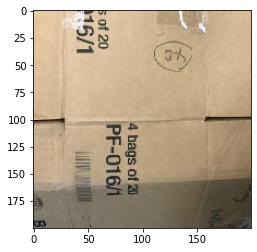

not garbage


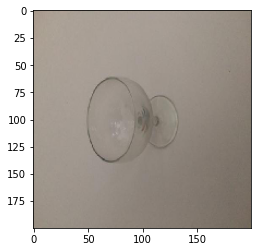

not garbage


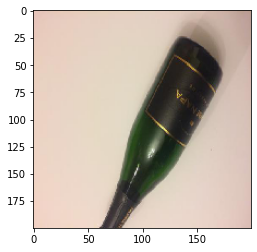

not garbage


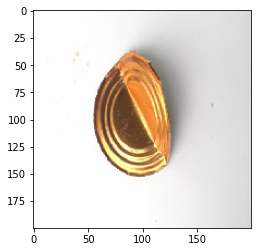

not garbage


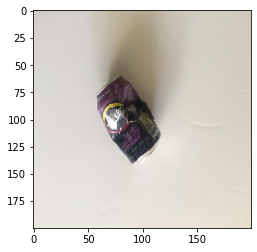

not garbage


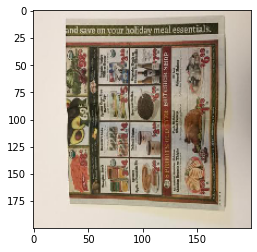

not garbage


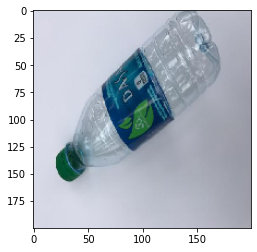

not garbage


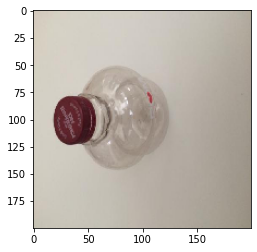

not garbage


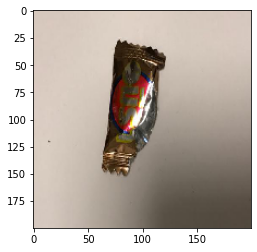

not garbage


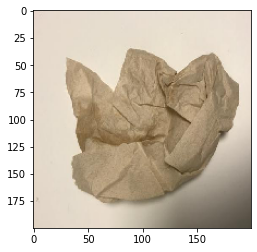

not garbage


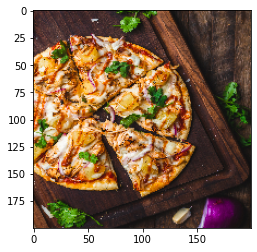

not garbage


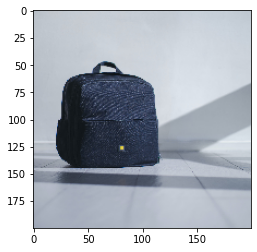

not garbage


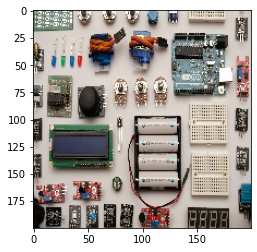

not garbage


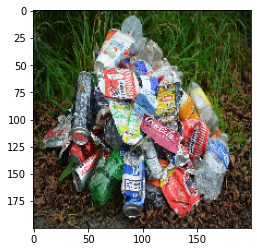

not garbage


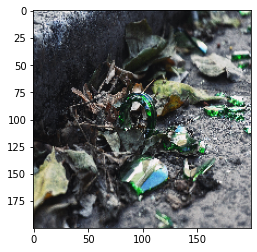

not garbage


In [ ]:
dir_path = '/content/drive/MyDrive/new garbage dataset/test'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis =0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("garbage")
    else:        
        print("not garbage")